<a href="https://colab.research.google.com/github/norasaleh1/project236/blob/main/phase2%20and%203%2C%2010pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check balance:

Number of Depressed (1): 252
Number of Not Depressed (0): 250
Percentage of Depressed: 50.20%
Percentage of Not Depressed: 49.80%


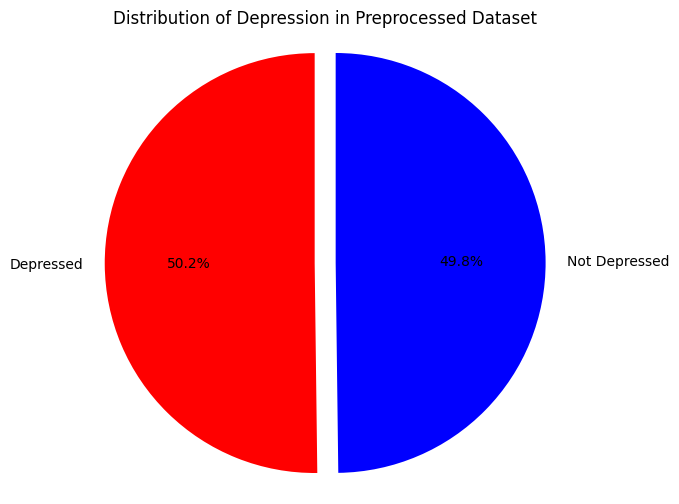

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Preprocessed_dataset.csv')

# Use the Depression column directly (already 0 and 1)
selector_values = data['Depression']

# Count how many are Depressed (1) and Not Depressed (0)
num_class_1 = selector_values[selector_values == 1].count()
num_class_2 = selector_values[selector_values == 0].count()

# Calculate percentages
total = num_class_1 + num_class_2
percentage_class_1 = (num_class_1 / total) * 100
percentage_class_2 = (num_class_2 / total) * 100

# Print results
print("Number of Depressed (1):", num_class_1)
print("Number of Not Depressed (0):", num_class_2)
print("Percentage of Depressed: {:.2f}%".format(percentage_class_1))
print("Percentage of Not Depressed: {:.2f}%".format(percentage_class_2))

# Plot pie chart
labels = ['Depressed', 'Not Depressed']
sizes = [percentage_class_1, percentage_class_2]
colors = ['red', 'blue']
explode = (0.1, 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Depression in Preprocessed Dataset')
plt.show()


**The data is balanced since the diffrince so small.**

# Loading data:


In [ ]:
import pandas as pd
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree
df = pd.read_csv('Preprocessed_dataset.csv');
print(df)

     Gender  Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0         1   28               0.25                0.75               1   
1         1   28               0.75                1.00               0   
2         1   25               0.00                0.50               0   
3         1   23               0.00                0.75               3   
4         0   31               0.00                1.00               3   
..      ...  ...                ...                 ...             ...   
497       1   26               1.00                0.25               3   
498       1   24               0.25                0.00               2   
499       0   23               0.50                1.00               0   
500       1   33               0.75                0.75               3   
501       1   18               1.00                0.50               3   

     Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0                 1     

# Feature Selection:


In [ ]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df['Depression']

## Gini

# (70% Training and 30% Test)

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Display sample of dataset
df.head()

Gender  Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0       1   28               0.25                0.75               1   
1       1   28               0.75                1.00               0   
2       1   25               0.00                0.50               0   
3       1   23               0.00                0.75               3   
4       0   31               0.00                1.00               3   

   Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0               1                                      1     0.750000   
1               0                                      1     0.583333   
2               2                                      1     0.833333   
3               2                                      1     0.583333   
4               0                                      1     0.333333   

   Financial Stress  Family History of Mental Illness  Depression  
0              0.25                                 1           0  
1              0.00                                 1           0  
2              0.75                                 0           1  
3              0.25                                 1           0  
4              0.25                                 1           0

In [ ]:
# Define features (X) and label (y)
X = df.drop("Depression", axis=1)
y = df["Depression"]

X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 351
Testing samples: 151


In [ ]:
# Create the model using Gini index (default)
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_gini.fit(X_train, y_train)

# Predict
y_pred = clf_gini.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Gini, 70/30):", round(accuracy * 100, 2), "%")


Accuracy (Gini, 70/30): 84.77 %


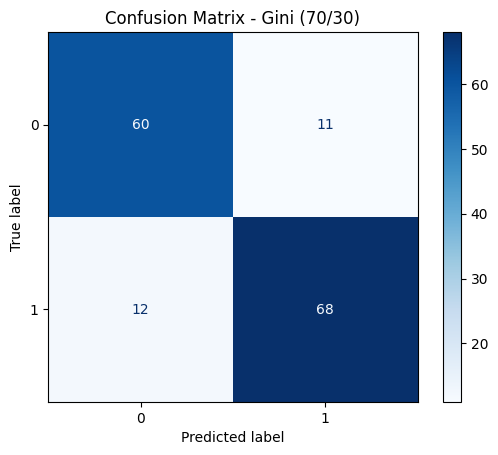

In [ ]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_gini.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gini (70/30)")
plt.show()


True Positives (Yes–Yes) = 68

True Negatives (No–No) = 60

False Positives (No–Yes) = 11

False Negatives (Yes–No) = 12

- Performance

Accuracy: 84.77%


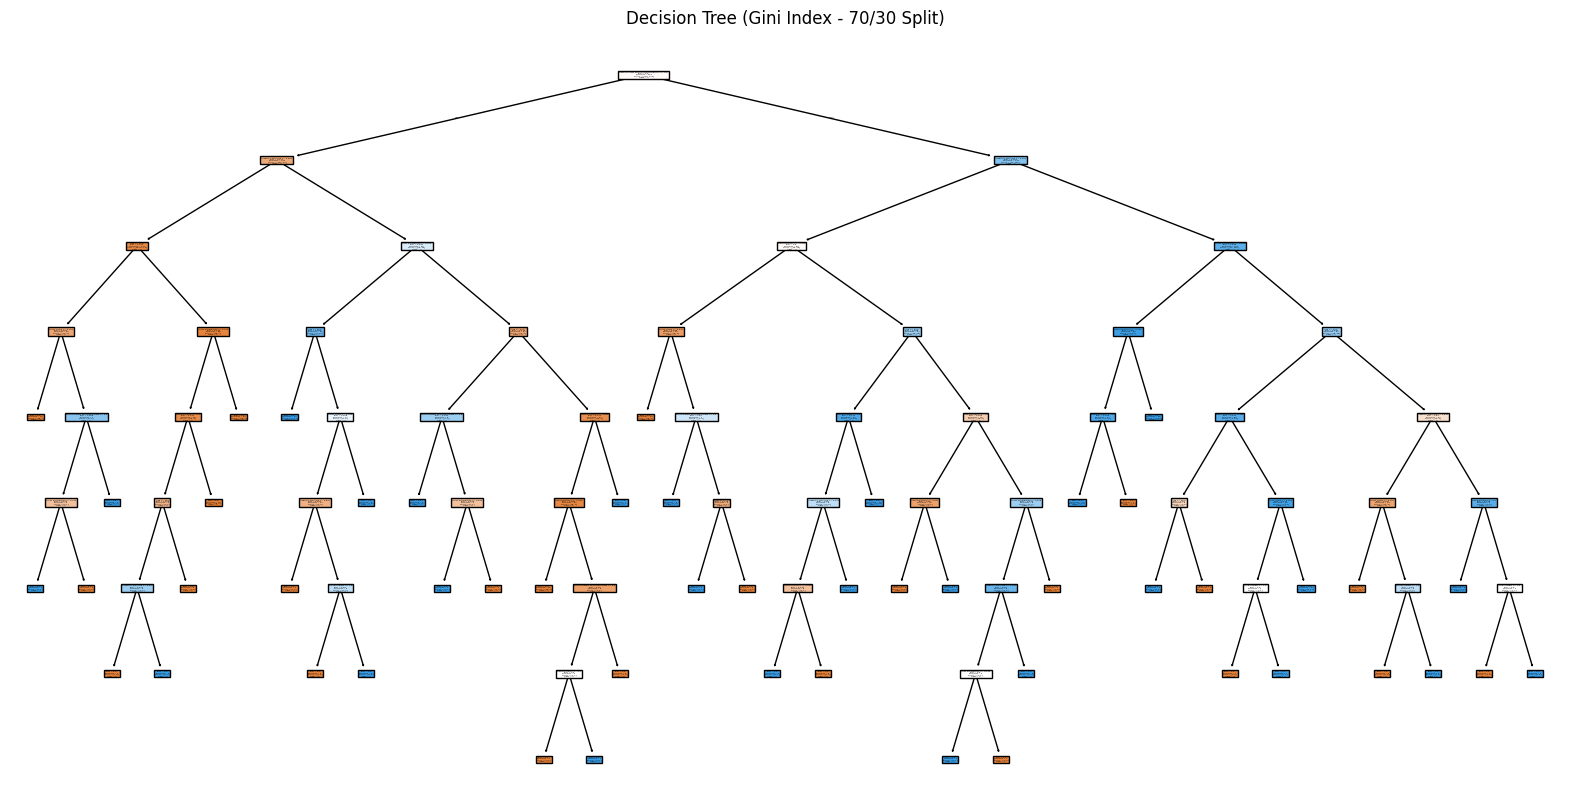

In [ ]:
# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(clf_gini, filled=True, feature_names=X.columns, class_names=clf_gini.classes_.astype(str))
plt.title("Decision Tree (Gini Index - 70/30 Split)")
plt.show()

# Splitting Data into: 90% Training and 10% Test


In [ ]:
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=1)

c6 = DecisionTreeClassifier(criterion='gini')

c6 = c6. fit (X_train, y_train)

y_pred = c6.predict (X_test)

# Confusion Matrix:


[[21  6]
 [ 2 22]]


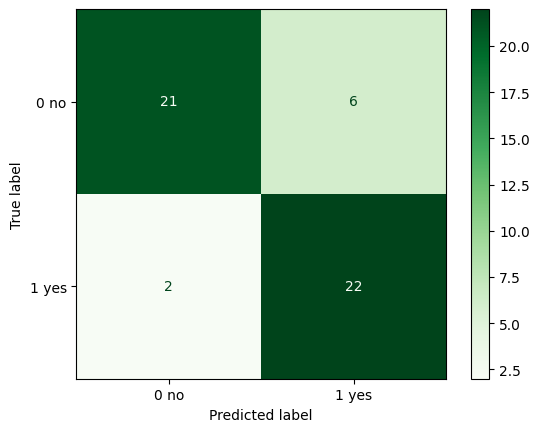

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm5 = confusion_matrix(y_test, y_pred)
print(cm5)

from sklearn.metrics import ConfusionMatrixDisplay
c=df['Depression'].unique()

cm5= confusion_matrix(y_test, y_pred)
class_labels = {0:'0 no', 1:'1 yes'}

# create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell:  represents the number of instances of the negative class correctly classified as negative (TN).

The top-right cell:  represents the number of instances of the negative class incorrectly classified as positive (FP).

The bottom-left cell:  represents the number of instances of the positive class incorrectly classified as negative (FN).

The bottom-right cell:  represents the number of instances of the positive class correctly classified as positive (TP)

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

class_labels = {0: 'no', 1: 'yes'}

# Plot the decision tree
plot_tree(c6,
          feature_names=c6.feature_names_in_,
          class_names=[class_labels[0], class_labels[1]],
          filled=True)

plt.show()

In this tree, the splitting process begins with the criterion of ( Have you ever had suicidal thoughts ?), where samples are segregated based on their (Root node feature: Have you ever had suicidal thoughts ?)node values. The selection of features at each node is determined by their gini values.

This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether deppresed or not) based on the path followed through the tree.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm5 = confusion_matrix(y_test,y_pred)
print("confusion matrix : \n",cm5)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm5[1, 1]
TN = cm5[0, 0]
FP = cm5[0, 1]
FN = cm5[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[21  6]
 [ 2 22]]
Accuracy: 0.8431372549019608
Error Rate: 0.1568627450980392
Sensitivity: 0.9166666666666666
Specificity: 0.7777777777777778
Precision: 0.7857142857142857


Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 84%.

Error Rate: represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 15%.

Sensitivity (Recall) : measures the proportion of actual positives that are correctly. In this case, it's approximately 91%.

Specificity: measures the proportion of actual negatives that are correctly. It's around 77% in this scenario.

Precision: the proportion of positive identifications that were actually correct. Here, it's about 78%.

**Model Performance Summary**

The model demonstrates a solid overall performance with an accuracy of approximately 84%, indicating that it correctly classifies a high proportion of both positive and negative cases. The error rate is around 15%, reflecting a relatively low level of incorrect predictions.

The model shows strong capability in identifying actual positive cases, as seen by a sensitivity (recall) of 91%, which means it successfully detects most of the true positives. In terms of recognizing actual negative cases, the model achieves a specificity of around 77%, suggesting a good, though slightly lower, performance in correctly identifying negatives.

Furthermore, the precision is approximately 78%, indicating that most of the instances predicted as positive are indeed positive.



# (80% Training and 20% Test)

In [ ]:

X = df.drop('Depression', axis=1)
y = df['Depression']


In [ ]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 401
Testing set size: 101


Accuracy (Gini): 0.8811881188118812
Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        48
           1       0.87      0.91      0.89        53

    accuracy                           0.88       101
   macro avg       0.88      0.88      0.88       101
weighted avg       0.88      0.88      0.88       101



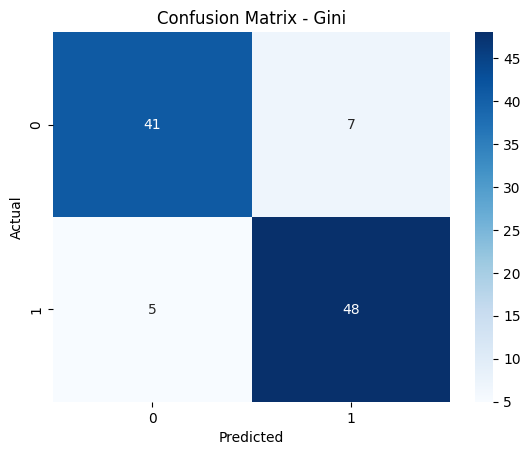

In [ ]:
from sklearn.metrics import classification_report
# Initialize and train the model
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Predict on the test set
y_pred_gini = dt_gini.predict(X_test)

# Accuracy and evaluation
print("Accuracy (Gini):", accuracy_score(y_test, y_pred_gini))
print("Classification Report (Gini):\n", classification_report(y_test, y_pred_gini))

# Confusion Matrix
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(conf_matrix_gini, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Gini")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

A Decision Tree classifier using the Gini index was trained to predict depression. The model achieved an accuracy of 88.12%, meaning it correctly classified most test samples.

According to the classification report:

For the non-depressed class (0):

Precision was 89% (how many predicted non-depressed were actually correct).

Recall was 85% (how many actual non-depressed were correctly identified).

F1-score was 87%, indicating balanced performance.

For the depressed class (1):

Precision was 87%

Recall was 91%

F1-score was 89%

The model shows strong performance overall, especially in identifying depressed individuals, with slightly higher recall for the positive class. The balanced precision, recall, and F1-scores suggest the model is reliable for both classes.

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_gini is your trained model from previous cells
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 20), dpi=500)

class_labels = {0: 'no', 1: 'yes'}

# Plot the decision tree using dt_gini
plot_tree(dt_gini,  # Changed from c6 to dt_gini
          feature_names=dt_gini.feature_names_in_,  # Changed from c6 to dt_gini
          class_names=[class_labels[0], class_labels[1]],
          filled=True)

plt.show()

Feature names labeled on each node,

Class labels shown as "yes" (for depression) and "no" (for no depression),

Colored nodes to represent class predictions and purity (how mixed the data is at that node).

The plot helps interpret how the model makes decisions based on the features, showing the paths it follows to classify a person as depressed or not.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[46  2]
 [ 0 53]]
Accuracy: 0.9801980198019802
Error Rate: 0.01980198019801982
Sensitivity: 1.0
Specificity: 0.9583333333333334
Precision: 0.9636363636363636


A logistic regression model was used to predict depression. The model achieved a high accuracy of 98%, with a low error rate of 1.98%. According to the confusion matrix, it correctly identified all depressed cases (Sensitivity: 100%), and 95.83% of non-depressed cases (Specificity). The precision was 96.36%, indicating that most of the positive predictions were correct. Overall, the model performed very well in classifying depression cases.

## Entropy

# (70% Training and 30% Test)

Accuracy (Entropy, 70/30): 86.09 %


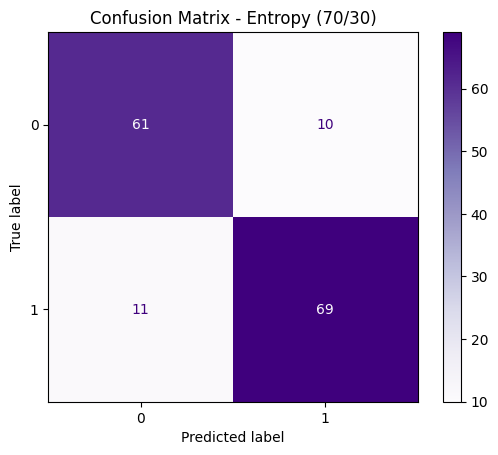

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


X = df.drop("Depression", axis=1)
y = df["Depression"]


X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf_entropy.fit(X_train, y_train)


y_pred = clf_entropy.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Entropy, 70/30):", round(accuracy * 100, 2), "%")


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_entropy.classes_)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - Entropy (70/30)")
plt.show()


True Positives (Yes–Yes) = 69

True Negatives (No–No) = 61

False Positives (No–Yes) = 10

False Negatives (Yes–No) = 11
- Performance

Accuracy: 86.09%

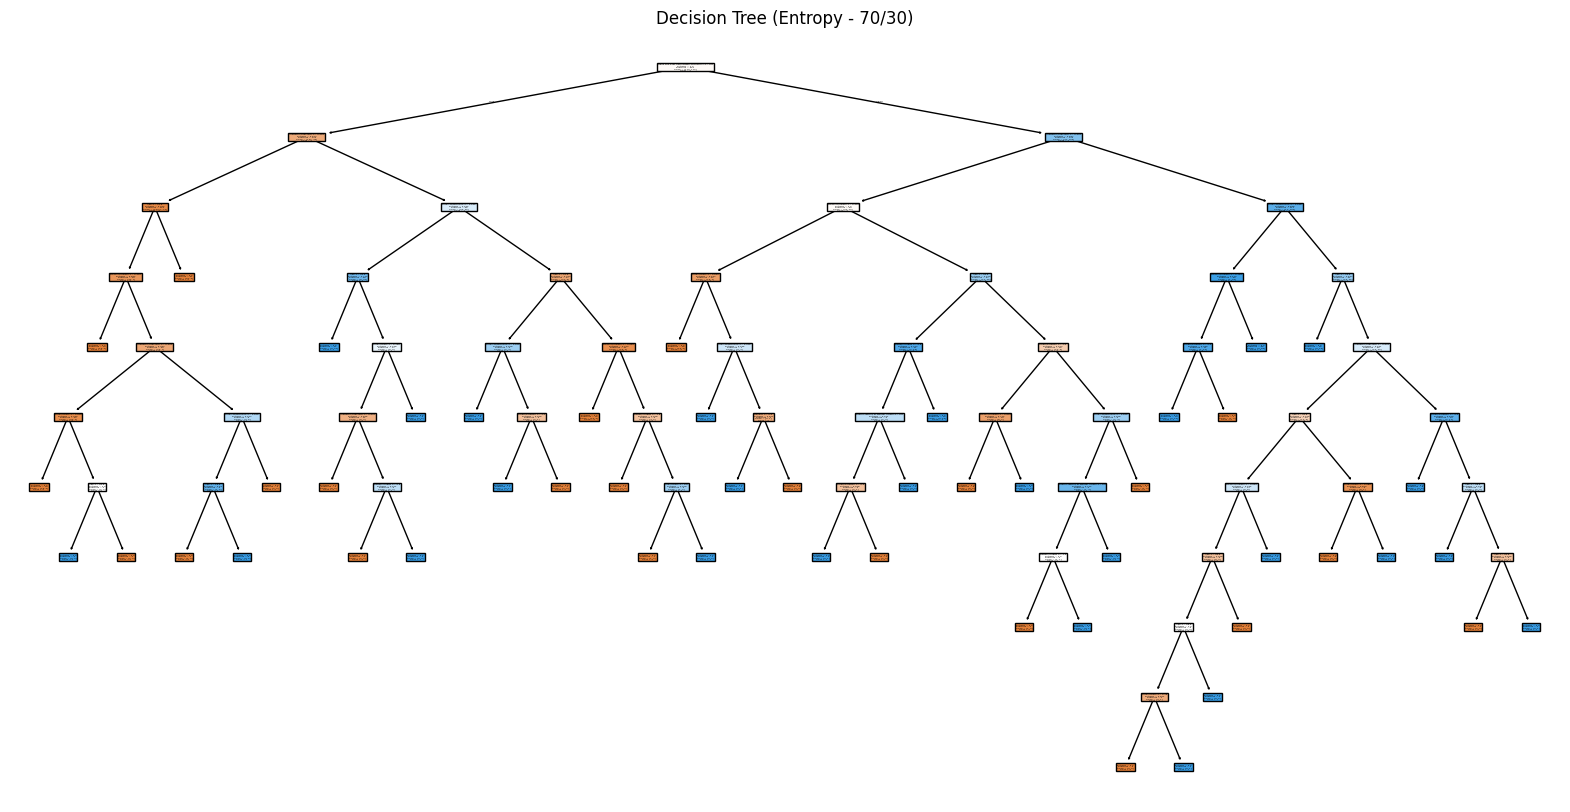

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf_entropy, filled=True, feature_names=X.columns, class_names=clf_entropy.classes_.astype(str))
plt.title("Decision Tree (Entropy - 70/30)")
plt.show()


Final Comparison –Splitting Data into 70% Training and 30% Test( Gini vs Entropy )

- Entropy slightly outperforms Gini in both accuracy and detection of depression cases (lower false negatives).


- Gini is still a solid model and computationally faster, but in this case, Entropy provides better overall performance.


# Splitting Data into: 90% Training and 10% Test


In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Identify and remove samples with missing values in y
missing_indices = np.isnan(y)
X = X[~missing_indices]
y = y[~missing_indices]

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# Create Decision Tree classifier object
clf4 = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifier
clf4 = clf4.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = clf4.predict(X_test)

# Confusion matrix



[[24  3]
 [ 2 22]]


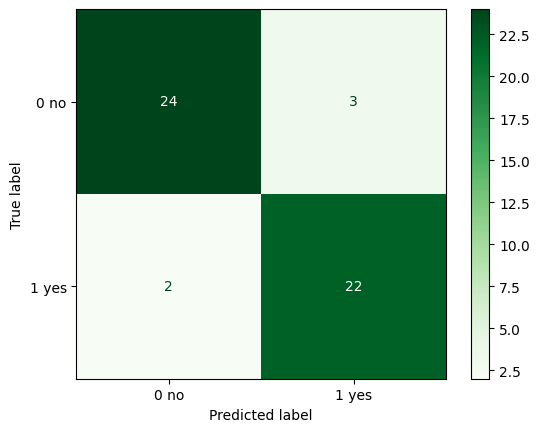

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

#compute and print the confusion matrix

cm4 = confusion_matrix(y_test, y_pred)
print(cm4)

from sklearn.metrics import ConfusionMatrixDisplay
c=df['Depression'].unique()

cm4 = confusion_matrix(y_test, y_pred)
class_labels = {0:'0 no', 1:'1 yes'}

# create a confusion matrix display object
disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=[class_labels[0], class_labels[1]])
disp.plot(cmap=plt.cm.Greens)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:
The top-left cell:  represents the number of instances of the negative class correctly classified as negative (TN).
The top-right cell:  represents the number of instances of the negative class incorrectly classified as positive (FP).
The bottom-left cell:  represents the number of instances of the positive class incorrectly classified as negative (FN).
The bottom-right cell:  represents the number of instances of the positive class correctly classified as positive (TP).

# Decision Tree:


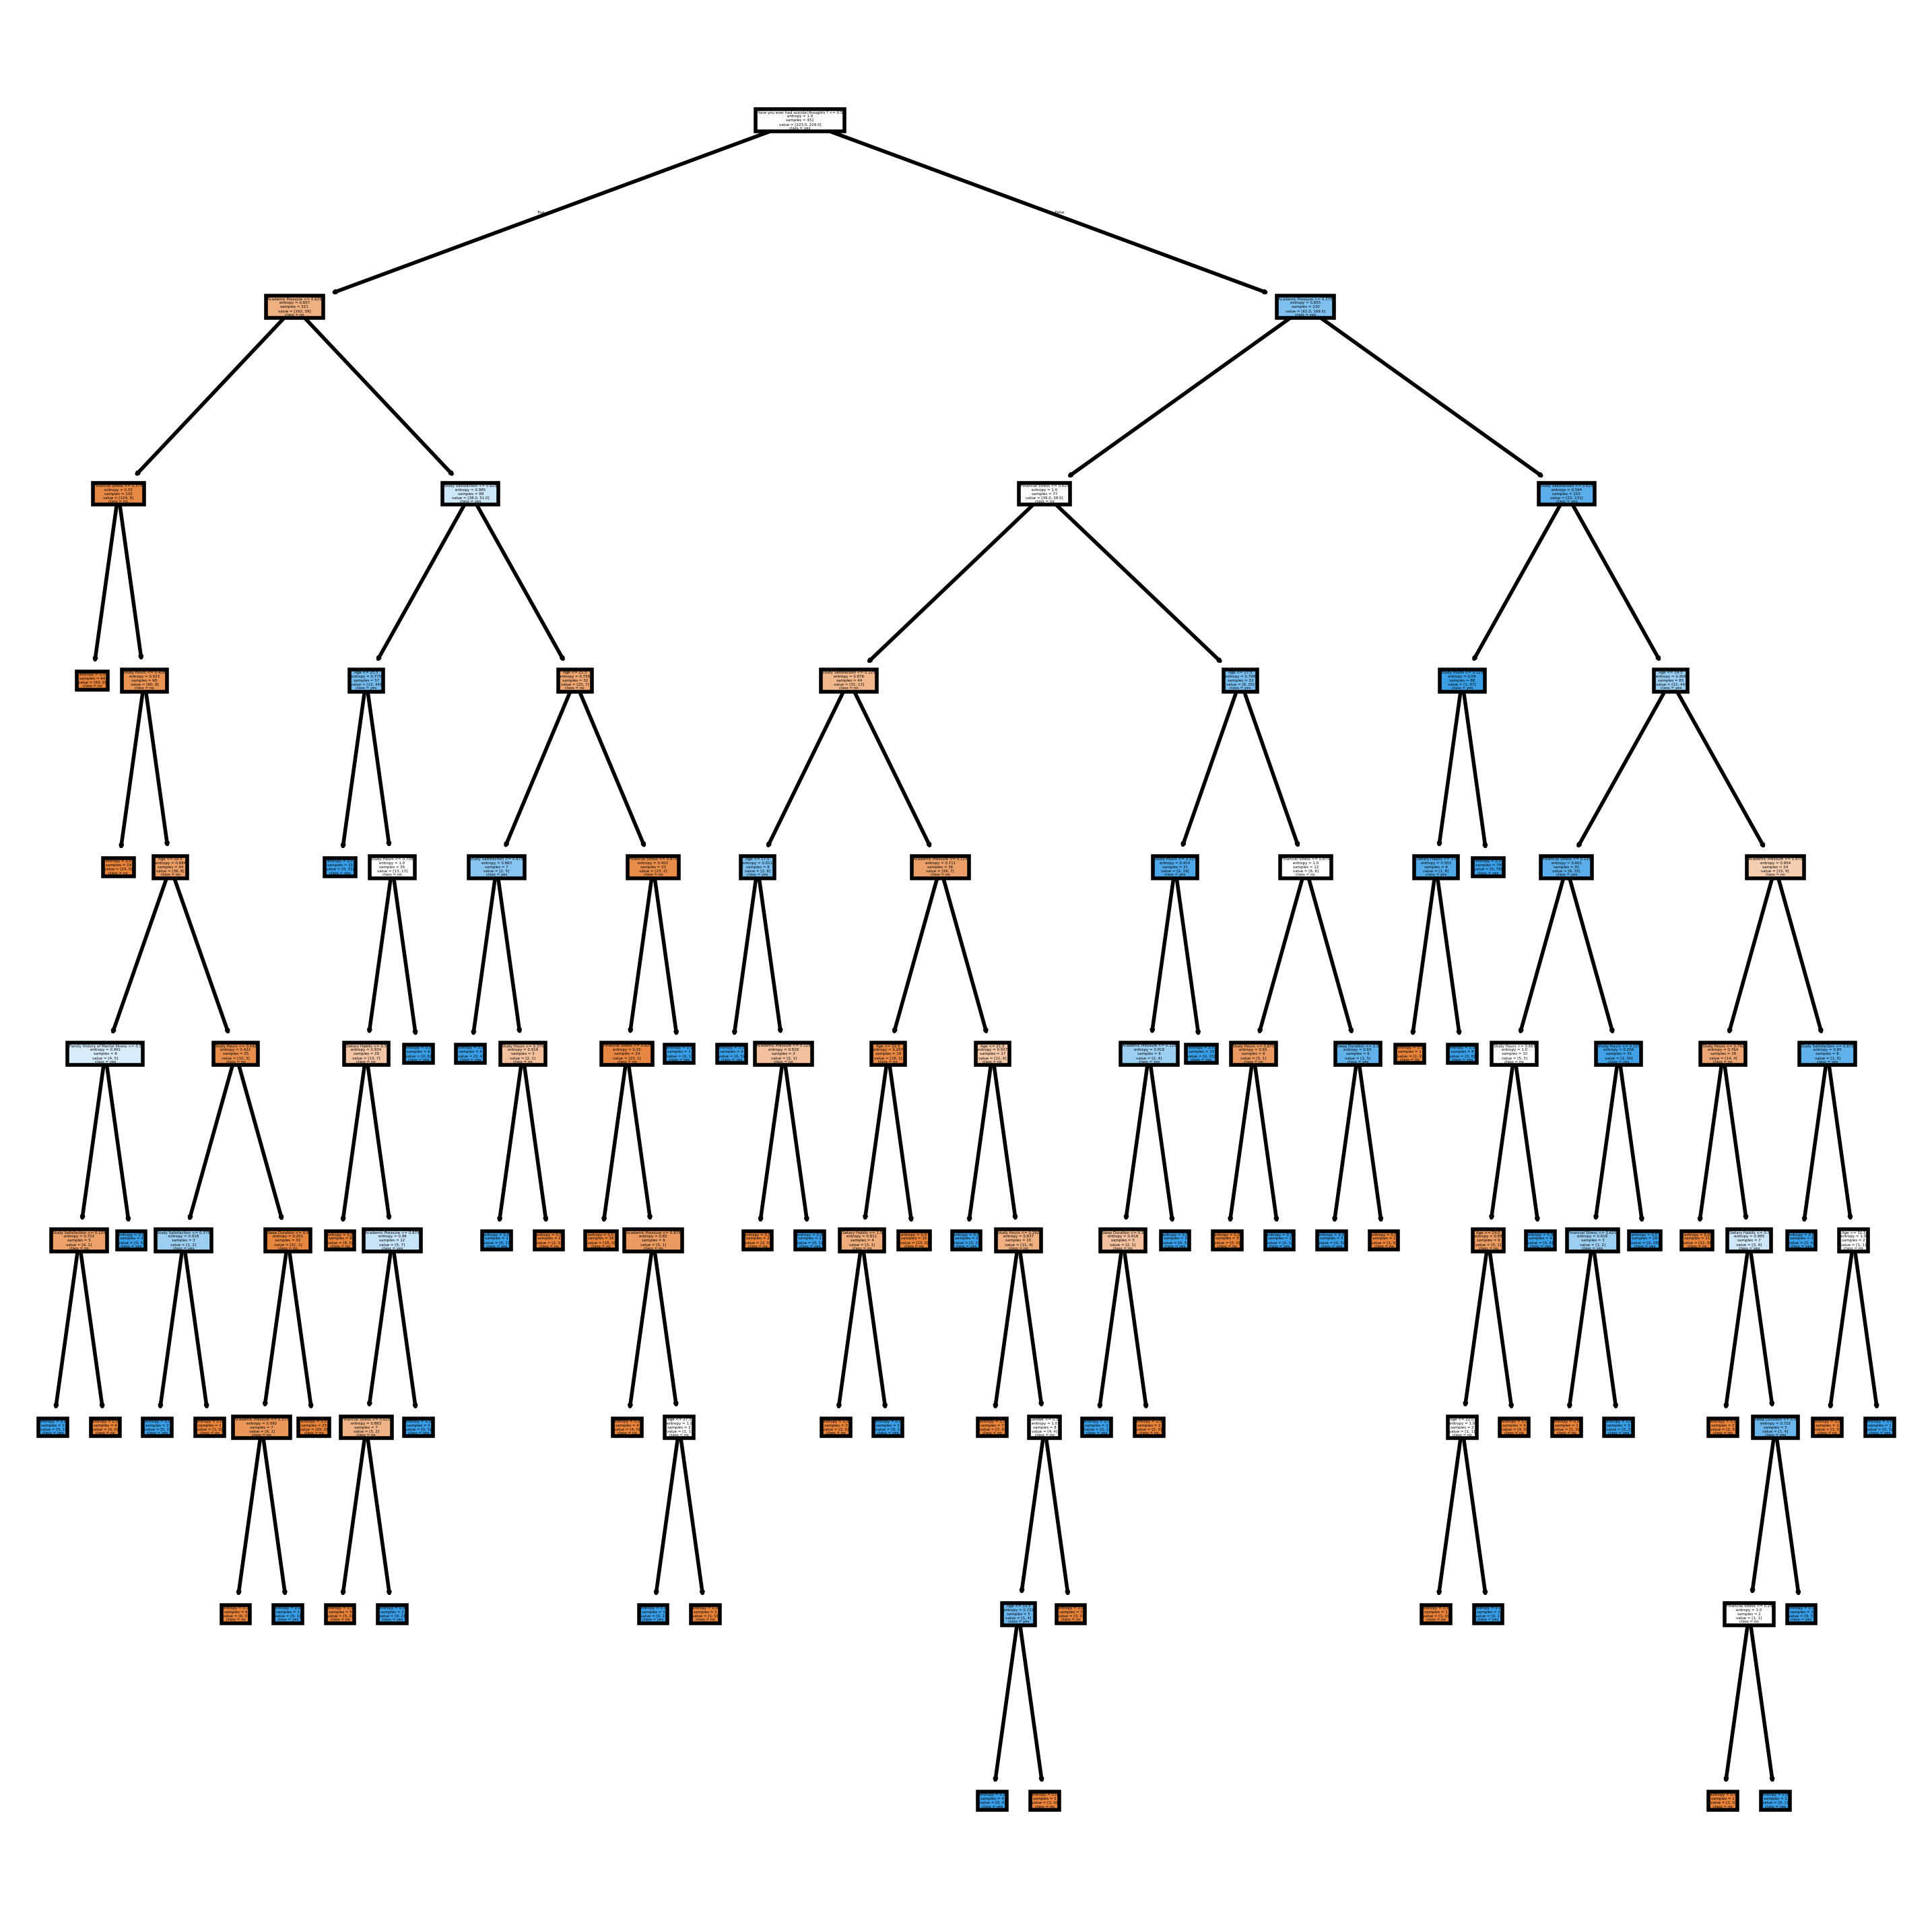

In [ ]:
from sklearn import tree

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,9), dpi=400)


class_labels = {0:'no', 1:'yes'}

tree.plot_tree(clf4,
               feature_names=fn,
               class_names=[class_labels[0], class_labels[1]],
               filled=True
               )

plt.show()


In this tree, the splitting process begins with the criterion of ( Have you ever had suicidal thoughts ?), where samples are segregated based on their (Root node feature: Have you ever had suicidal thoughts ?)node values. The selection of features at each node is determined by their entropy values.

This splitting procedure persists for each attribute, guided by their respective values at each level, until reaching the leaf nodes. These leaf nodes act as terminal points, providing the final classification (whether deppresed or not) based on the path followed through the tree.

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n",cm4)


# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)


# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]


# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)


# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)


# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[24  3]
 [ 2 22]]
Accuracy: 0.9019607843137255
Error Rate: 0.0980392156862745
Sensitivity: 0.9166666666666666
Specificity: 0.8888888888888888
Precision: 0.88


Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 90%.

Error Rate: represents the proportion of wrong predictions out of all predictions. Here, the error rate is around 9%.

Sensitivity (Recall) : measures the proportion of actual positives that are correctly. In this case, it's approximately 91%.

Specificity: measures the proportion of actual negatives that are correctly. It's around 88% in this scenario.

Precision: the proportion of positive identifications that were actually correct. Here, it's about 88%.

**Model Performance Summary**

The model shows excellent performance, achieving an accuracy of approximately 90%, indicating a high rate of correct predictions overall. The error rate is low, at around 9%, reflecting minimal incorrect classifications.

It performs well in detecting actual positive cases, with a sensitivity (recall) of 91%, meaning it correctly identifies the vast majority of true positives. Similarly, the model is highly effective at identifying true negatives, as reflected by a specificity of around 88%.

The precision is also strong at 88%, indicating that most positive predictions made by the model are indeed correct

# (80% Training and 20% Test)

In [ ]:

X = df.drop('Depression', axis=1)
y = df['Depression']


In [ ]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 401
Testing set size: 101


Accuracy (Entropy): 0.8910891089108911
Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        48
           1       0.89      0.91      0.90        53

    accuracy                           0.89       101
   macro avg       0.89      0.89      0.89       101
weighted avg       0.89      0.89      0.89       101



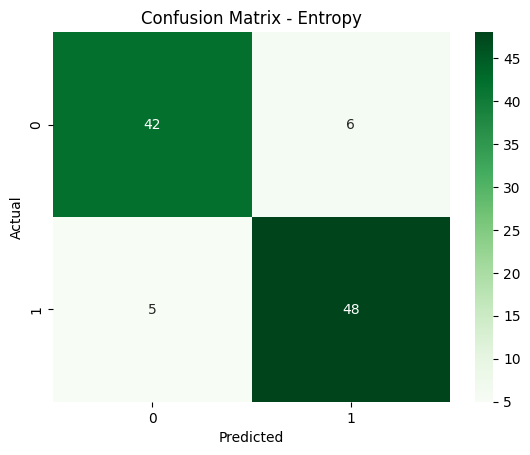

In [ ]:

# Initialize and train the model
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Predict on the test set
y_pred_entropy = dt_entropy.predict(X_test)

# Accuracy and evaluation
print("Accuracy (Entropy):", accuracy_score(y_test, y_pred_entropy))
print("Classification Report (Entropy):\n", classification_report(y_test, y_pred_entropy))

# Confusion Matrix
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(conf_matrix_entropy, annot=True, cmap='Greens', fmt='d')
plt.title("Confusion Matrix - Entropy")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The Decision Tree using the Entropy criterion evaluates splits based on information gain. After training, the model predicts test data and its performance is assessed using accuracy, a classification report (precision, recall, F1-score), and a confusion matrix. The confusion matrix shows actual vs. predicted values, highlighting correct predictions and errors, and is visualized using a green heatmap for clarity.










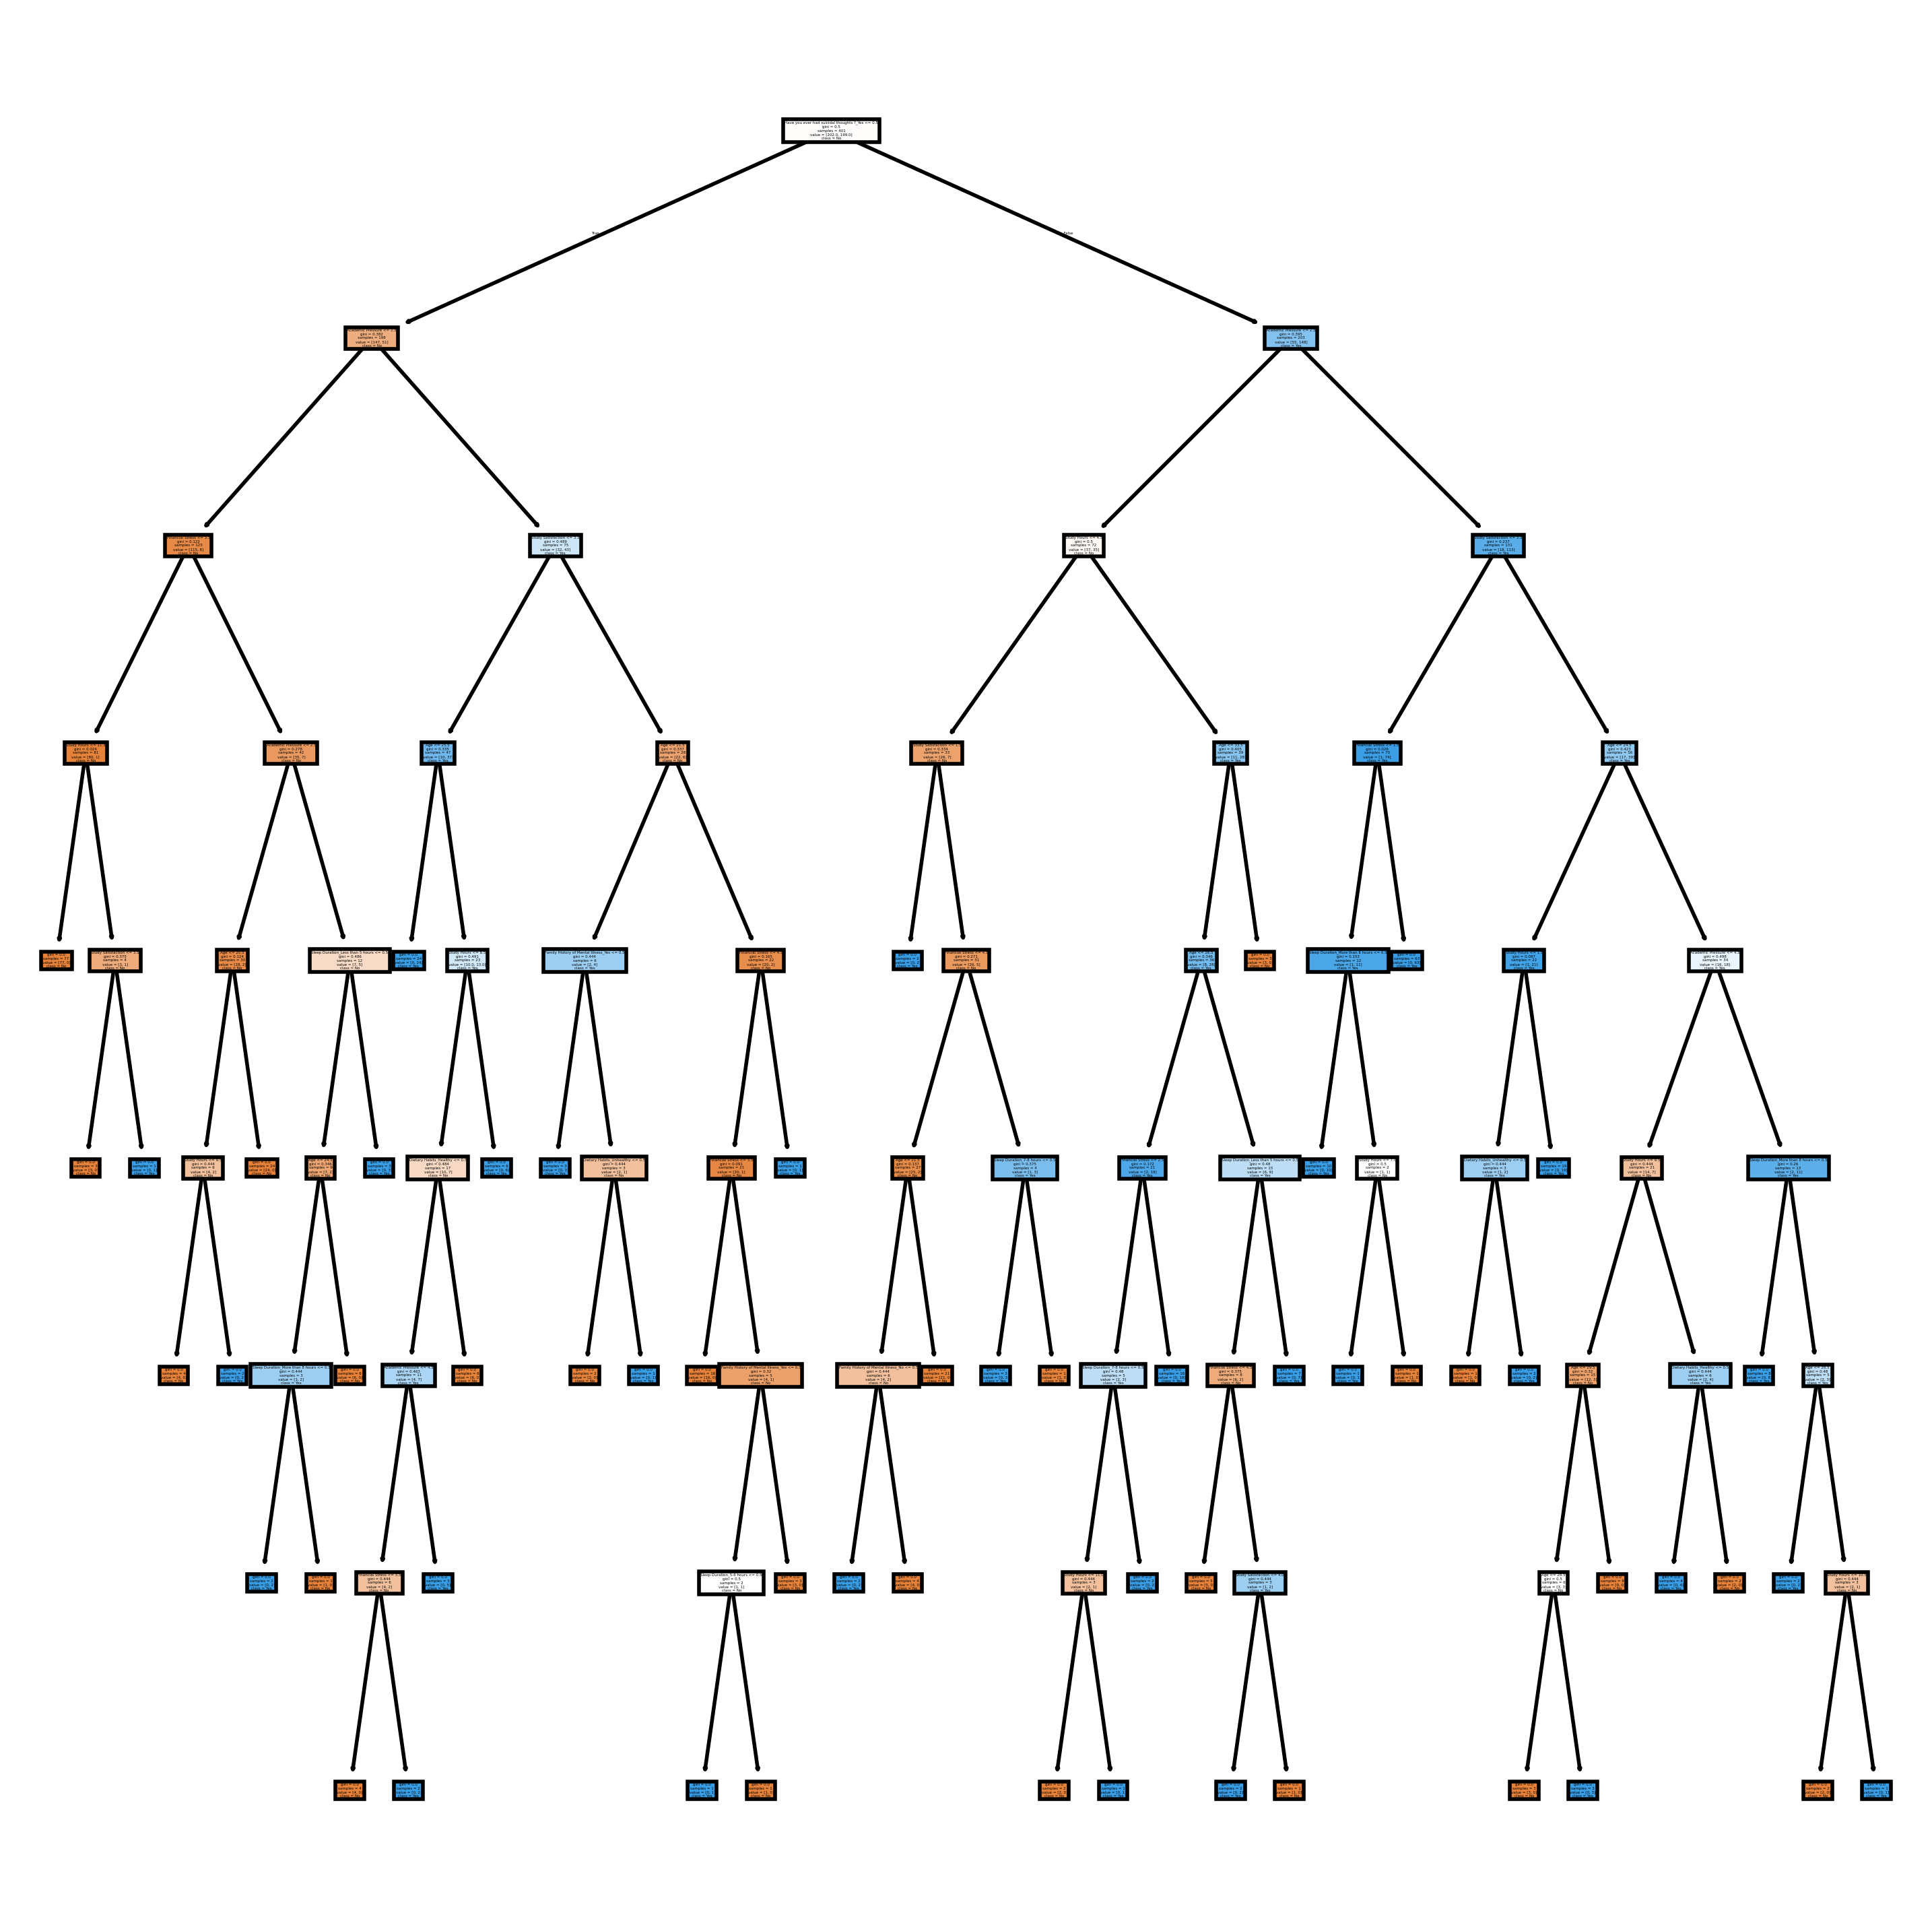

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("Preprocessed_dataset.csv")

X = df.drop('Depression', axis=1)
y = df['Depression']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


clf1 = tree.DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)


fn = X.columns.tolist()


class_labels = {'No': 'No', 'Yes': 'Yes'}


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9, 9), dpi=400)

tree.plot_tree(clf1,
               feature_names=fn,
               class_names=[class_labels['No'], class_labels['Yes']],
               filled=True)

plt.show()

In this visualization, we display a Decision Tree classifier that was trained on the Preprocessed_dataset.csv dataset. The tree structure represents how the model makes decisions to classify whether a person is experiencing depression (Yes or No), based on the features provided.

The tree starts with a root node, which is the most important feature selected by the algorithm to split the data first.
This selection is based on the Gini index, which helps the model decide the best feature to split the data to maximize class purity.

From the root node, the tree branches out based on the values of the feature at that node. Each internal node (or decision node) contains a condition (e.g., feature <= threshold), which decides whether the path moves to the left or right child node.

As we go deeper into the tree, each node represents a new decision based on a different feature. These splits continue until the tree reaches a leaf node.

The leaf nodes are the terminal nodes, which provide the final classification result (either Yes or No for depression) based on the sequence of decisions taken from the root to that leaf.

The filled=True parameter in the plot highlights the nodes with colors to indicate the majority class in each node — this makes it easier to visually interpret the outcome of each decision path.

The feature names (fn) used in the plot come from the dataset after encoding categorical variables using pd.get_dummies, ensuring all inputs are numerical.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Load the dataset
df = pd.read_csv('/Preprocessed_dataset.csv')

# Features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the total number of correct predictions
correct_predictions = np.trace(cm)

# Calculate the total number of predictions (sum of all elements in the confusion matrix)
total_predictions = np.sum(cm)

# Calculate the total number of incorrect predictions
incorrect_predictions = total_predictions - correct_predictions

# Calculate accuracy
accuracy = correct_predictions / total_predictions

# Calculate error rate
error_rate = incorrect_predictions / total_predictions

# Print results
print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)


Confusion Matrix:
 [[46  2]
 [ 0 53]]
Accuracy: 0.9801980198019802
Error Rate: 0.019801980198019802


-Accuracy: measures the proportion of true results. In this case, the model's accuracy is approximately 0.98%.
-Error Rate: represents the proportion of wrong predictions out of all predictions.Here, the error rate is around 0.019%

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
df = pd.read_csv('/Preprocessed_dataset.csv')

# Features and target
X = df.drop('Depression', axis=1)
y = df['Depression']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Compute and print the confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("confusion matrix : \n", cm4)

# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate is simply 1 minus the Accuracy
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm4[1, 1]
TN = cm4[0, 0]
FP = cm4[0, 1]
FN = cm4[1, 0]

# Sensitivity (Recall)
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision
precision = TP / (TP + FP)
print("Precision:", precision)

confusion matrix : 
 [[46  2]
 [ 0 53]]
Accuracy: 0.9801980198019802
Error Rate: 0.01980198019801982
Sensitivity: 1.0
Specificity: 0.9583333333333334
Precision: 0.9636363636363636


A logistic regression model was used to predict depression. The model achieved a high accuracy of 98%, with a low error rate of 1.98%. According to the confusion matrix, it correctly identified all depressed cases (Sensitivity: 100%), and 95.83% of non-depressed cases (Specificity). The precision was 96.36%, indicating that most of the positive predictions were correct. Overall, the model performed very well in classifying depression cases.

# cluestring
clustring is unsupervised learning that doesnt rely on labled data

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv('Preprocessed_dataset.csv')

# Extract the features (excluding the target variable, if any)
features = df.drop('Depression', axis=1)

# Use StandardScaler to scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Create a new DataFrame with the scaled features

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)

# Display the scaled DataFrame
print("\nScaled DataFrame:")
print(df_scaled.head())


Scaled DataFrame:
     Gender       Age  Academic Pressure  Study Satisfaction  Sleep Duration  \
0  0.938163  0.359587          -0.723007            0.673631       -0.456140   
1  0.938163  0.359587           0.717269            1.402429       -1.350603   
2  0.938163 -0.253706          -1.443146           -0.055168       -1.350603   
3  0.938163 -0.662569          -1.443146            0.673631        1.332785   
4 -1.065913  0.972881          -1.443146            1.402429        1.332785   

   Dietary Habits  Have you ever had suicidal thoughts ?  Study Hours  \
0       -0.019659                               0.964764     0.694256   
1       -1.253272                               0.964764     0.159311   
2        1.213953                               0.964764     0.961728   
3        1.213953                               0.964764     0.159311   
4       -1.253272                               0.964764    -0.643106   

   Financial Stress  Family History of Mental Illness  
0    

# Silhouette method


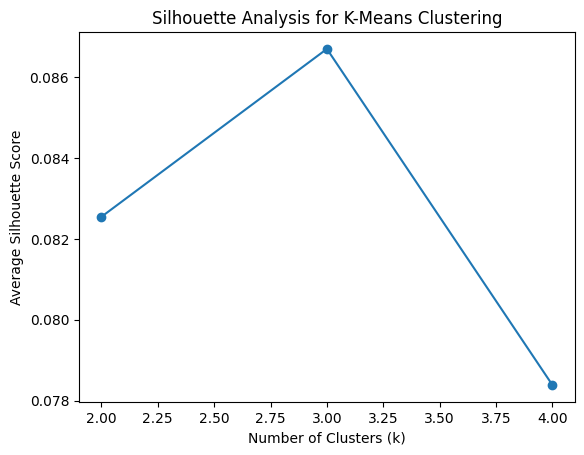

The highest average Silhouette score is 0.08669039139444638 with k=3.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('Preprocessed_dataset.csv')

# Perform k-means clustering with different values of k
k_values = [2, 3, 4]
silhouette_avg_values = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_result = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, kmeans_result)
    silhouette_avg_values.append(silhouette_avg)

# Find the best number of clusters based on the highest average Silhouette score
best_k = k_values[np.argmax(silhouette_avg_values)]
best_score = max(silhouette_avg_values)


# Plot the silhouette scores for different values of k
plt.plot(k_values, silhouette_avg_values, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.show()

print(f"The highest average Silhouette score is {best_score} with k={best_k}.")


# Elbow method

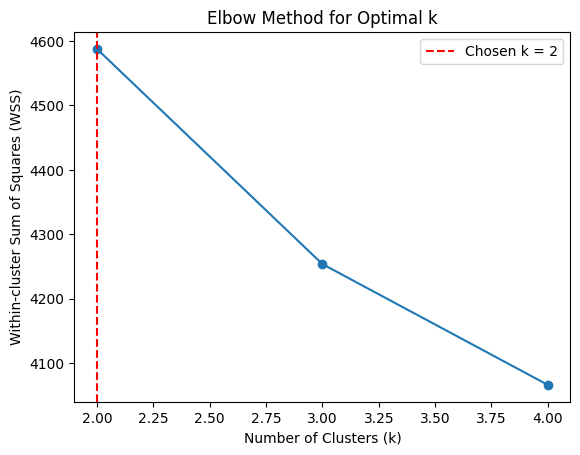

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
!pip install kneed
from kneed import KneeLocator

X = df_scaled

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering for different values of k
wss_values = []
k_values = [2, 3, 4]

for k in k_values:
    kmeans = make_pipeline(StandardScaler(), KMeans(n_clusters=k, n_init='auto'))
    kmeans.fit(X_scaled)
    wss_values.append(kmeans.named_steps['kmeans'].inertia_)

# Plot the elbow method
plt.plot(k_values, wss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')

knee = KneeLocator(k_values, wss_values, curve='convex', direction='decreasing')
turning_point = knee.elbow if knee.elbow is not None else 2

plt.axvline(x=turning_point, linestyle='--', color='red', label=f'Chosen k = {turning_point}')
plt.legend()
plt.show()


# When K = 2

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[-0.18445211 -0.13070843  0.0628697   0.04160192 -0.73821155 -0.37796988
  -0.00681531  0.37129138  0.0824344   0.19300681]
 [ 0.17031784  0.12069246 -0.0580521  -0.03841403  0.68164362  0.34900667
   0.00629307 -0.34283994 -0.07611759 -0.17821702]]

Cluster Labels:
[0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1
 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0
 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1

 This output shows the result of applying K-Means clustering with k = 2 on the scaled dataset.
The "Cluster Centers" represent the average values of each feature for the two clusters. Each row corresponds to a cluster, and each value shows the average of a specific feature in that cluster. This helps identify the characteristics of each group.

The "Cluster Labels" indicate which cluster each data point belongs to — either cluster 0 or cluster 1. For example, if a data point has label 0, it means it is closer to the first cluster center.

This result gives an overview of how the data was grouped and highlights the main differences between the two clusters.





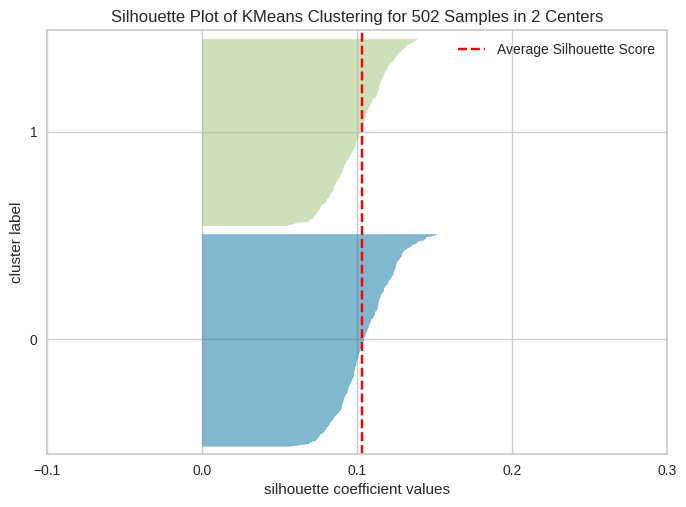

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 502 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

This Silhouette plot visualizes the clustering performance for K=2, based on 502 samples from the dataset. Each horizontal bar represents one data point and how well it fits within its assigned cluster.

The red dashed line indicates the average silhouette score, which is slightly above 0.1. This value is considered low, meaning the clusters are not well separated, and there is a significant amount of overlap between them. Some samples have scores close to 0.0, which suggests they are near the boundary between the two clusters and might not be strongly associated with either group.

Overall, the plot shows that while the algorithm was able to separate the data into two groups, the distinction between them is not very strong, and the clustering structure may be unclear or weak.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X_scaled = df_scaled

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 4590.509765883874
Average Silhouette Score: 0.08254468255718951


The result for K=2 shows a Within-Cluster Sum of Squares (WSS) of 4590.51, meaning the points within each cluster are somewhat spread out. The Silhouette Score is 0.0825, which reflects a weak cluster structure—many points may not be strongly matched with their own cluster. This indicates that the separation between the two clusters is not very clear.



# When K=3

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

# Perform K-means clustering for K=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')  # Set n_init explicitly
kmeans_result= kmeans.fit(df_scaled)

#Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result. labels_)

Cluster Centers:
[[-0.05086145 -0.53513123 -0.05898376  0.05367853  0.8100471   0.15657121
  -0.59468054 -0.35826515  0.04125091  0.22495826]
 [ 0.47472046  0.71223098 -0.06588119 -0.09160796  0.24824903  0.28874398
   0.56450643  0.00217121 -0.155965   -0.52003266]
 [-0.36235431 -0.16780185  0.10438558  0.03399351 -0.874825   -0.3739947
   0.00670093  0.29162467  0.09894553  0.25830667]]

Cluster Labels:
[1 2 1 0 0 2 1 0 1 1 2 1 0 2 0 2 0 0 0 1 0 1 1 2 2 2 1 0 2 1 0 1 1 2 1 0 0
 0 0 2 2 0 1 2 2 0 2 1 2 1 0 2 2 2 0 0 1 0 1 1 0 1 2 0 2 0 1 2 2 1 0 1 1 1
 2 2 2 1 0 0 1 2 2 1 1 2 2 2 0 1 2 0 0 0 0 1 0 1 2 1 2 0 0 2 2 2 0 2 0 1 2
 2 2 0 0 1 0 1 0 1 1 1 2 0 2 2 0 1 2 2 1 2 0 0 1 1 2 0 1 2 2 2 2 0 1 2 2 1
 1 0 0 0 2 1 2 0 2 1 0 1 2 0 0 2 0 1 2 1 2 2 1 1 1 0 0 0 1 0 1 2 0 0 1 2 0
 1 1 0 2 2 0 0 2 1 0 0 1 2 2 0 0 0 0 1 2 1 1 2 1 1 0 1 1 2 0 2 0 1 2 1 2 1
 1 2 2 0 0 0 0 1 1 1 2 0 2 1 0 1 1 2 1 0 0 1 1 0 2 2 0 1 0 1 1 1 0 2 1 1 2
 2 0 0 0 1 1 1 2 1 2 2 1 1 0 1 2 1 2 2 1 2 0 2 0 0 2 1 0 0 2 2 1 1

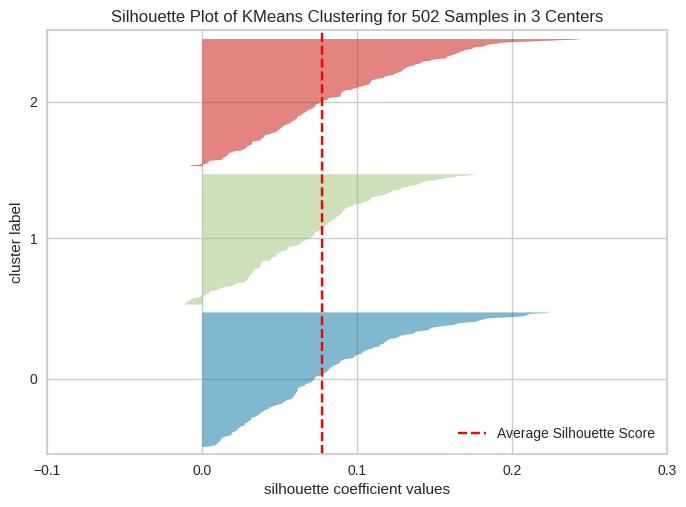

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 502 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)
p

WSS: 4245.135105027511
Average Silhouette Score: 0.08669039139444638


For k=3, the WSS (4245.14) reflects the compactness of the clusters, indicating the total variance within clusters. The silhouette score (0.0867) is low, but still it is the highest among k=2, 3, and 4. This indicates that k=3 provides the best clustering structure within this range, though overall cluster separation remains weak.



















# K=4

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(42)

# Perform K-means clustering for K=5
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(df_scaled)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[ 0.21446894  0.25737156  0.39053986  0.18101673 -0.45614033 -0.53366441
   0.96476382  0.55556655 -0.02117028  0.07441125]
 [-1.06591285 -0.2305633  -0.20668183  0.01358656  0.2358025   0.21309793
   0.39836186 -0.64058251  0.308814    0.13145323]
 [ 0.90802652 -0.13074032 -0.14364801 -0.08804616  0.52575104  0.87076797
   0.10706942 -0.19061501  0.15600169 -0.1926433 ]
 [-0.1996349   0.09052931 -0.00751513 -0.05986995 -0.29455998 -0.521063
  -1.03652311  0.21453132 -0.33029754  0.0235555 ]]

Cluster Labels:
[0 0 2 2 1 2 1 1 3 2 0 2 1 0 2 0 2 1 1 2 2 2 2 3 0 3 0 2 1 0 3 1 0 3 2 2 3
 2 2 1 3 2 2 3 1 2 3 2 3 3 3 0 3 3 2 2 2 2 2 1 3 2 0 2 3 3 1 3 1 3 0 1 2 2
 3 3 3 0 2 2 2 1 3 0 1 2 0 3 3 2 0 1 3 3 1 1 2 0 3 2 3 3 1 1 3 0 3 3 1 2 1
 3 3 1 3 0 2 2 2 2 1 2 0 1 0 1 2 0 0 3 2 1 3 1 0 1 0 1 0 1 0 1 2 2 3 0 3 0
 2 1 1 1 1 0 0 3 0 3 2 0 3 2 3 0 1 2 1 2 0 3 0 2 2 2 2 2 2 2 1 3 3 1 2 0 3
 0 0 2 0 0 3 3 3 3 3 3 0 3 1 3 2 2 1 3 3 1 1 1 2 2 2 2 0 3 1 3 3 1 1 0 0 3
 1 0 3 1 3 3 2 2 

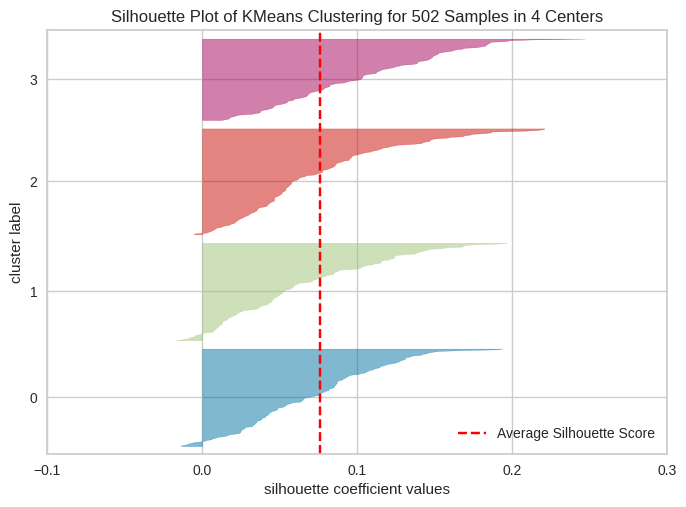

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 502 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(df_scaled)
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Assuming X_scaled is your scaled data
X = df_scaled

# Perform k-means clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Compute the WSS (Within-Cluster Sum of Squares)
wss = kmeans.inertia_

# Compute the Average Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the evaluation metrics
print("WSS:", wss)
print("Average Silhouette Score:", silhouette_avg)

WSS: 4064.5015230693507
Average Silhouette Score: 0.0783910781271985


The WSS (4064.50) indicates the total variance within clusters, and the low silhouette score (0.078) suggests that the clustering structure is weak, meaning the clusters may be overlapping or not well defined. This implies that k=4 may not be the optimal number of clusters for our dataset








